In [1]:
# general imports
import numpy as np
from matplotlib import pyplot as plt

$$
\DeclareMathOperator{\R}{\mathbb{R}}
\DeclareMathOperator{\N}{\mathbb{N}}
\DeclareMathOperator{\cos}{cos}
$$

> #### Exercise 1.1
>Calculate the Taylor series at the expansion point x = 0 of the functions $ \frac{1}{x-1} $  and $ \frac{1}{1+x^2} $, and plot the Taylor polynomials for $n \in \{10, 20, 40\}$ on the interval $[−2, 2]$.
Hint: A partial fraction decomposition of the second function explains the bad behaviour of the harmless looking function.


The Taylor series expansion of a function $f$ at the expansion point $x_0$ is given by 

$$
 f(x) = \sum_{k= 0}^\infty \frac{f^{(k)}(x_0)}{k!} (x-x_0)^k. \tag{1}
$$

The derivatives of our functions $f_1 (x) := \frac{1}{1-x} \text{ and } f_2(x) := \frac{1}{1+x^2}$ can be computed as

$$
f_1^{(k)}(x) = -\frac{k!}{(x-1)^{k+1}}
$$

and 

$$
\begin{split}
f_2^{(k)}(x) &= \frac{1}{2}i \left( \frac{1}{x+i}-\frac{1}{x-i} \right)^{(k)} \\
&= \frac{k!(-1)^k}{2}i \left( \frac{1}{(x+i)^{k+1}}-\frac{1}{(x-i)^{k+1}}  \right).
\end{split}
$$


Evaluating (1) with $x_0 = 0$ yields

$$
f_1(x) = \sum_{k= 0}^\infty - x^k
$$

and 

$$
f_1(x) = \sum_{k= 0}^\infty  (-1)^{k} x^{2k}.
$$

As hinted above, the term $(-1)^{k}$ causes the approximated function's bad behaviour. 

For the following implementation denote the n$^{\text{th}}$ Taylor polynomial of $f$ with expansion point $0$ by 

$$
T(f,n) : = \sum_{k= 0}^n \frac{f^{(k)}(0)}{k!} (x-x_0)^k. 
$$

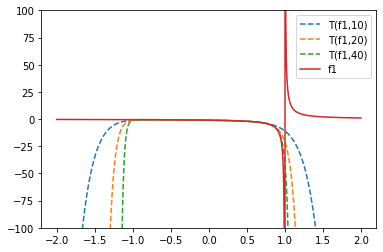

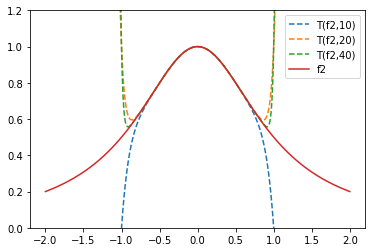

In [2]:
# %matplotlib

# define functions
f1 = lambda x: 1 / (x-1)
f2 = np.vectorize(lambda x: 1/(1+x*x))

# define Taylor expansion
Tf1 = np.vectorize(lambda n, x: sum([-x**k for k in range(n+1)]))
Tf2 = np.vectorize(lambda n, x: sum([x**(2*k)*(-1)**k for k in range(int(n/2)+1)]))

x = np.linspace(-2,2,2000)
x = x[np.where(x != 1.0)]

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


for n in [10, 20, 40]:
    ax1.plot(x, Tf1(n,x), '--', label='T(f1,{})'.format(n))
    ax2.plot(x, Tf2(n,x), '--', label='T(f2,{})'.format(n))

    
ax1.set_ylim((-100,100))
ax2.set_ylim((0,1.2))
ax1.plot(x, f1(x), label='f1')
ax2.plot(x, f2(x), label='f2')

ax1.legend()
ax2.legend()

plt.show()


> #### Exercise 1.2
>Compute and plot interpolation polynomials to $ \frac{1}{1+x^2} $ on the interval $[−5, 5]$ for $n \in \{10, 20, 40\}$. Choose uniformly distributed points, and Chebyshev points on $[−5, 5]: x_i = 5 \cos \frac{(i+0.5)\pi}{n+1}$ for $ i = 0, .., n$.
>
> Plot the Lagrange interpolation polynomials $l_i$ for both choices of points. Investigate numerically 
>$$
 \max_{i \in \{0,..,n\}} \max_{x \in [-1,1]} |l_i(x)| \qquad \text{and} \qquad \max_{x \in [-1,1]} \sum_{i=0}^n |l_i(x)|
$$
> depending on n.


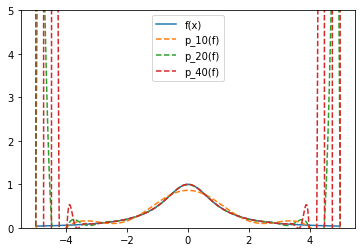

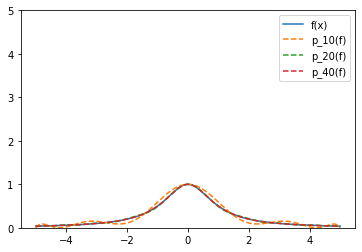

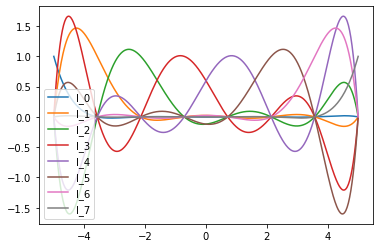

max max |li(x)| for uniformly distr:
 1.6629739196654647
max sum |li(x)| for uniformly distr:
 6.92929655693685


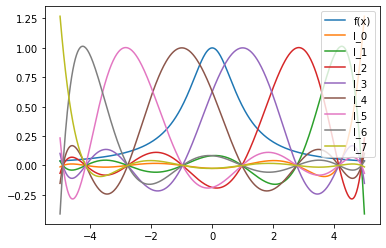

max max |li(x)| for chebychev:
 1.0
max sum |li(x)| for uniformly distr:
 2.2870160684585645


In [3]:
f = np.vectorize(lambda x: 1/(1+x*x))
# f = np.vectorize(lambda x: np.sin(x))


p = lambda y, l: np.vectorize(lambda x: sum([y[i]*l(x,i) for i in range(0,len(y))]))
def gen_l (pnts):
    def l(x, i):
        ret = 1
        for xk in pnts:
            if xk != pnts[i]: ret *= (x-xk)/(pnts[i]-xk)
        return ret
    return np.vectorize(l)

x = np.linspace(-5,5,500)

# uniformly distr pnts approx polynom 
plt.figure()
plt.plot(x, f(x), label= 'f(x)')
for n in [10,20,40]:
    pnts = np.linspace(-5,5,n)
    y = f(pnts)
    l = gen_l(pnts)
    plt.plot(x,np.vectorize(p(y, l))(x), '--',label = "p_{}(f)".format(n))
plt.ylim((0,5))
plt.legend()
plt.show()


# chebychev pnts approx polynom 
plt.figure()
plt.plot(x, f(x), label= 'f(x)')
for n in [10,20,40]:
    pnts = 5*np.cos((np.arange(0,n+1)+0.5)*np.pi/(n+1))
    y = f(pnts)
    l = gen_l(pnts)
    plt.plot(x, np.vectorize(p(y, l))(x), '--', label = "p_{}(f)".format(n))
plt.ylim((0,5))
plt.legend()
plt.show()

# uniformly distr pnts lagrange
n = 8
plt.figure()
pnts = np.linspace(-5,5,n)
l = gen_l(pnts)
for i in range(0,n):
    plt.plot(x,l(x, i), label = "l_{}".format(i))
plt.legend()
plt.show()
print("max max |li(x)| for uniformly distr:\n", 
     max([max(l(x, i)) for i in range(len(pnts))]))
suml = np.vectorize(lambda x: sum([abs(l(x,i)) for i in range(len(pnts))]))
print("max sum |li(x)| for uniformly distr:\n", 
     max(suml(x)))


# chebychev pnts lagrange
n = 8
plt.figure()
plt.plot(x, f(x), label= 'f(x)')
pnts = 5*np.cos((np.arange(0,n)+0.5)*np.pi/(n))
l = gen_l(pnts)
for i in range(0,n):
    plt.plot(x,l(x, i), label = "l_{}".format(i))
plt.legend()
plt.show()
print("max max |li(x)| for chebychev:\n", 
     max([max(l(pnts, i)) for i in range(len(pnts))]))
suml = np.vectorize(lambda x: sum([abs(l(x,i)) for i in range(len(pnts))]))
print("max sum |li(x)| for uniformly distr:\n", 
     max(suml(x)))


> #### Exercise 1.3
> Chebyshev polynomials are recursively defined as
>
> $$
\begin{split}
T_0(x) &= 1 \\
T_1(x) &= x \\
T_{n+1}(x) &= 2xT_n(x) -T_{n-1}(x) \qquad \text{for } n = 1,2,..
\end {split}
$$
> 
> * Plot the first few polynomials. What range do you expect ?
> * Determine the leading coefficient $lc(T_n)$
> * Show that there holds 
>$$
T_n(x) = \cos(n ~\text{acos}(x)) \qquad x \in [-1,1]
$$
> Find all roots of T_n.
> * Let $q$ be a polynomial of exact degree $n$ such that $lc(q) = lc(T_n)$. Proof that
> $$
 \max_{x \in [-1,1]} |q(x)| \geq  \max_{x \in [-1,1]} |T_n(x)|
$$



If we choose $x \in [-1,1]$ it is reasonable to expect an output in **range** $[-1,1]$ (can be shown by induction). If we extend the domain, the range will be $\R$, because the term $x^n$ is not bounded outside of the interval $[-1,1]$.

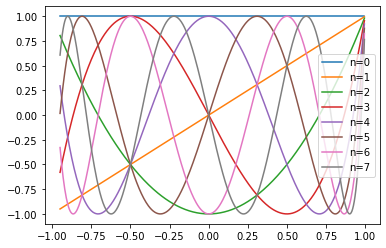

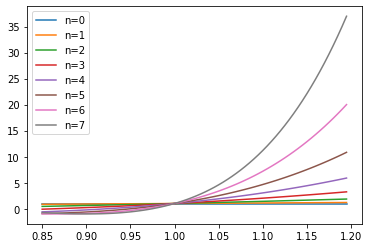

In [4]:
'''
# expensive recursive version
def T(n,x):
    if n == 0: return 1
    if n == 1: return x
    return 2*x*T(n-1,x)-T(n-2,x)
T = np.vectorize(T)
'''

# less expensive if all chebychev polynoms should be plotted
def Tplot(n,x,ax):
    
    b = np.ones(len(x))
    ax.plot(x, np.ones(len(x)), label="n=0")
    if n == 0: return
    
    a = x
    ax.plot(x, x, label="n=1")
    if n == 1: return
    
    for k in range(2,n+1):
        tmp = 2*np.multiply(x, a)-b
        ax.plot(x, tmp, label="n={}".format(k))
        b = a.copy()
        a = tmp.copy()
        
# bounded case
x = np.arange(-1+0.05,1, 0.005)
fig, ax = plt.subplots()
Tplot(7, x, ax)
ax.legend()
plt.show()

# unbounded even with values slightly out of the 'good' domain
x = np.arange(0.8+0.05,1.2, 0.005)
fig, ax = plt.subplots()
Tplot(7, x, ax)
ax.legend()
plt.show()

To determine the **leading coefficient** we only have to consider the term $2xT_n(x)$ of the recurrence relation, because the order of all other terms is smaller. Through induction we get $lc(T_n) = 2^{n-1}$.



Before determining the **roots** it is useful to prove the identity $T_n(x) = \cos(n ~\text{acos}(x))$ for $x \in [-1,1]$. Considering that we can use that the mapping 

$$
[0,\pi] \ni \theta \mapsto \cos(\theta) \in [-1,1]
$$

is bijective and  $\cos(n ~\text{acos}(\cos(\theta)) = \cos(n \theta)$. Therefore it suffices to show $T_n(\cos(\theta)) = \cos(n \theta)$ for all $\theta \in [0,\pi]$. We can do that by induction. 

The induction basis can be verified directly. To perform the induction step we can use the sum identity $\cos(\alpha)\cos(\beta) = \frac{1}{2}(\cos(\alpha-\beta)+\cos(\alpha+\beta))$ and get

$$
\begin{split}
    T_{n+1}(\cos( \theta)) &= 2\cos(\theta)\cos\left(n\theta\right) - \cos\left((n-1)\theta\right) \\
    &= \cos\left((n+1)\theta\right)
\end{split}
$$

Now it is easy to calculate the roots of $T_n(x)$ by solving the equation $\cos(n$ acos$(x_j))= 0$ for $x_j$. This leads to 
$$
x_j = \cos\left(\frac{(2j-1)\pi}{2n}\right) \qquad j = 1, .., n.
$$



The **inequality** we can be proved by contradiction. Let's assume that there is a $q$ with $lc(q) = lc(T_n)$ and $ \max_{x \in [-1,1]} |q(x)| <  \max_{x \in [-1,1]} |T_n(x)|$. We already know that $|T_n(x)|$ is bounded by 1. We can also show that in $[-1,1]$ the polynomial $T_n$ has $n+1$ local extrema $s_j = \cos\left(\frac{j\pi}{n}\right))$ for $j = 0,..,n$ and $T_n(s_j) = (-1)^j$. Therefore know two things: First that $\max_{x \in [-1,1]} |T_n(x)| = 1$ and $T_n$ has $n$ changes of sign, hence $n$ different roots. 

Because of the equality of the leading constants we know $T_n - q$ is a polynomial of degree $n-1$. But because of $\max_{x \in [-1,1]} |q(x)| <  \max_{x \in [-1,1]} |T_n(x)| = 1$ the difference polynomial still has $n$ changes of sign and hence $n$ roots. We conclude that $q-T_n = 0$, which is a contrdiction to $|q(x)| <  \max_{x \in [-1,1]} |T_n(x)|.$




> #### Exercise 1.4
>
> Implement the Aitken-Nevill scheme for polynomial interpolation. Test it for numerical differentiation by extrapolation for $f(x) = \sin(x)$
>
> $$
D_f(x,h) := \frac{f(x+h)-f(x)}{h}
$$
> and
> $$
D_{f,\text{sym}}(x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$
> 
> Choose $x = \pi$ and interpolation points $h_i = q^i$ for $i \in \{0,..,n\}$. Generate convergence plot for the errors $f'(x) -D_f(x,0)$. Try different refinement ratios $q \in (0,1)$. How does this effect speed of convergence, and reachable accuracy? Since $\lim_{h \rightarrow 0}D_{f, \text{sym}}(x,h) = \lim_{h \rightarrow 0}D_{f, \text{sym}}(x,\sqrt h)$ , try also extrapolation of the function $h \mapsto D_{f, \text{sym}}(x,\sqrt h)$

q=0.9: err not sym: 1.184385922670117e-12
q=0.9: err sym: 9.513645427006168e-11
q=0.7: err not sym: 1.2323475573339238e-14
q=0.7: err sym: 4.773959005888173e-15
q=0.5: err not sym: 4.440892098500626e-16
q=0.5: err sym: 1.0658141036401503e-14
q=0.3: err not sym: 4.873879078104437e-14
q=0.3: err sym: 3.5638159090467525e-14
q=0.1: err not sym: 2.1260770921571748e-13
q=0.1: err sym: 1.0524914273446484e-13


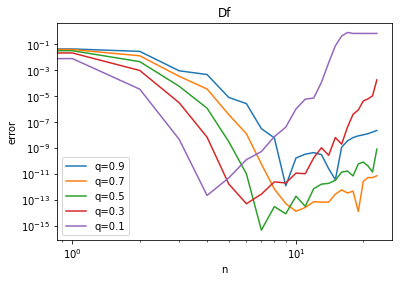

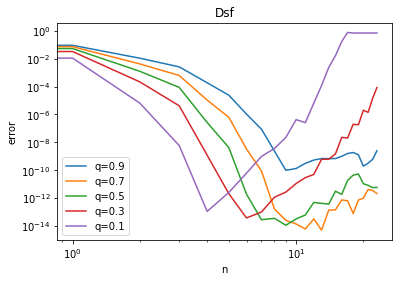

q=0.9: err not sym: 0.02004175838511324
q=0.9: err sym: 1.7317258738103192e-12
q=0.7: err not sym: 0.0019276072226916963
q=0.7: err sym: 2.220446049250313e-16
q=0.5: err not sym: 5.49077310283419e-05
q=0.5: err sym: 3.3306690738754696e-16
q=0.3: err not sym: 1.9683962193539628e-07
q=0.3: err sym: 2.220446049250313e-16
q=0.1: err not sym: 2.5503485989730734e-09
q=0.1: err sym: 1.887379141862766e-15


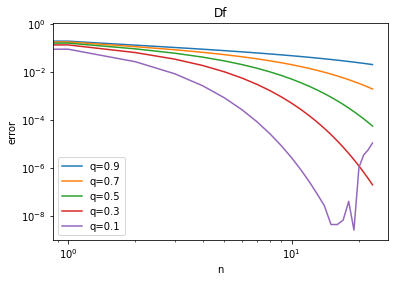

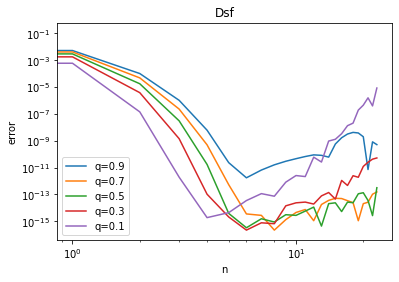

In [5]:
np.set_printoptions(formatter={'float':"{:.2e}".format})
# at x = pi/4 the effect that Dsym converges faster can be observed
pnt = np.pi/4
val = 2**(-1/2)
# pnt = np.pi
# val = -1
D = np.vectorize(lambda h: (np.sin(pnt+h)-np.sin(pnt))/h)
Ds = np.vectorize(lambda h: (np.sin(pnt+h)-np.sin(pnt-h))/(2*h))


#  Aitken-Neville scheme 
def p(h, y, x):
    ret = y.copy()
    n = len(h)-1
    for m in range(1,n+1):
        for j in range(0,n-m+1):
            ret[j] = ((x-h[j])*ret[j+1]-(x-h[j+m])*ret[j])/(h[j+m]-h[j])
    return ret[0]

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# convergence rates for h
for q in [0.9,0.7,0.5,0.3,0.1]:
    err1 = []
    err2 = []
    for n in range(1,25):
        h = np.array([q**i for i in range(n)])
        err1 += [abs(p(h, D(h), 0)-val)]
        err2 += [abs(p(h, Ds(h), 0)-val)]
    ax1.loglog(err1, label='q={}'.format(q))
    ax2.loglog(err2, label='q={}'.format(q))
    print("q={}: err not sym: {}".format(q, min(err1)))
    print("q={}: err sym: {}".format(q, min(err2)))
#     print(h)

ax1.set_title('Df')
ax1.set_xlabel('n')
ax1.set_ylabel('error')
ax1.legend()
ax2.set_title('Dsf')
ax2.set_xlabel('n')
ax2.set_ylabel('error')
ax2.legend()

plt.show()

# for h -> sqrt(h)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# convergence rates for h
for q in [0.9, 0.7,0.5,0.3,0.1]:
    err1 = []
    err2 = []
    for n in range(1,25):
        h = np.array([q**i for i in range(n)])
        err1 += [abs(p(h, D(h**(1/2)), 0)-val)]
        err2 += [abs(p(h, Ds(h**(1/2)), 0)-val)]
    ax1.loglog(err1, label='q={}'.format(q))
    ax2.loglog(err2, label='q={}'.format(q))
    print("q={}: err not sym: {}".format(q, min(err1)))
    print("q={}: err sym: {}".format(q, min(err2)))


ax1.set_title('Df')
ax1.set_xlabel('n')
ax1.set_ylabel('error')
ax1.legend()
ax2.set_title('Dsf')
ax2.set_xlabel('n')
ax2.set_ylabel('error')
ax2.legend()

plt.show()